In [62]:
import pandas as pd
df = pd.read_csv('wine_train.csv')
codes = {0 : 'bad', 1 : 'normal', 2 : 'good' }
df.quality = [0 if x < 6 else (1 if x == 6 else 2 ) for x in df.quality ]

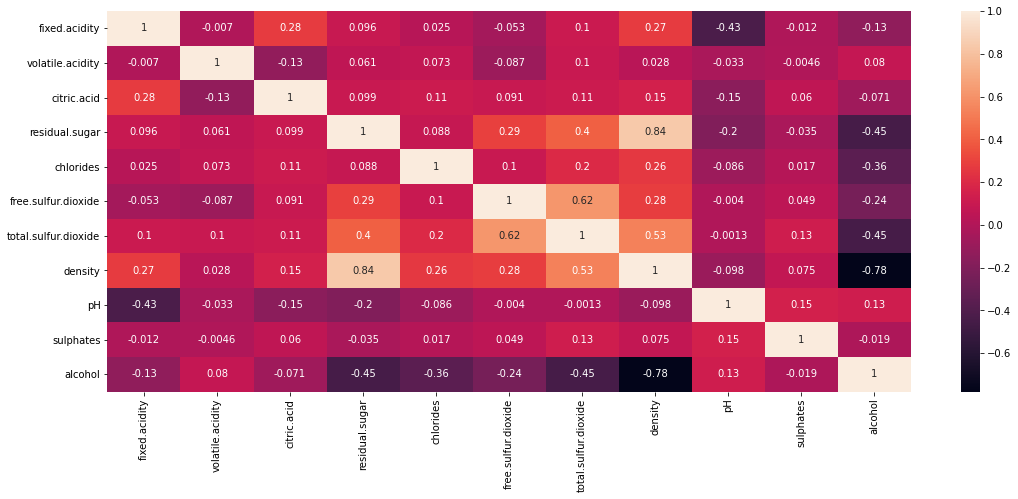

In [63]:
import matplotlib
import matplotlib.pyplot as plt
ignore = ['quality']
var = [x for x in df.columns if x not in ignore]
import seaborn as sb
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sb.heatmap(df[var].corr(),annot=True)
plt.show()

In [49]:
#features = ['density', 'residual.sugar', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'alcohol']
#new = df.drop(columns = features)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
feature1 = ['residual.sugar', 'density', 'alcohol']
# Separating out the features
x = df.loc[:, feature1].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['pca_1',])


feature2 = ['total.sulfur.dioxide', 'free.sulfur.dioxide']
# Separating out the features
x2 = df.loc[:, feature2].values
# Standardizing the features
x2 = StandardScaler().fit_transform(x2)
pca = PCA(n_components=1)
principalComponents2 = pca.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['pca_2'])


In [65]:
new = pd.concat([principalDf1, principalDf2, df.drop(columns = feature1 + feature2)], axis = 1)

In [66]:
new.head()

,pca_1,pca_2,fixed.acidity,volatile.acidity,citric.acid,chlorides,pH,sulphates,quality
0,0.289083,1.030793,9.0,0.245,0.38,0.045,2.93,0.35,1
1,-1.851597,-0.822625,8.2,0.420,0.29,0.030,3.00,0.32,2
2,-0.291017,-1.771163,6.4,0.220,0.32,0.028,3.13,0.55,2
3,-0.521782,-0.848899,5.0,0.350,0.25,0.031,3.39,0.40,1
4,-0.020593,0.805499,7.4,0.300,0.30,0.053,3.12,0.45,1


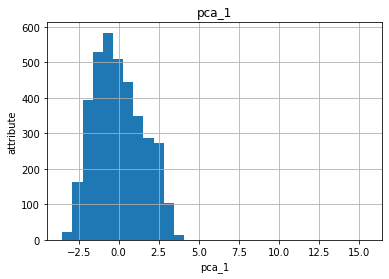

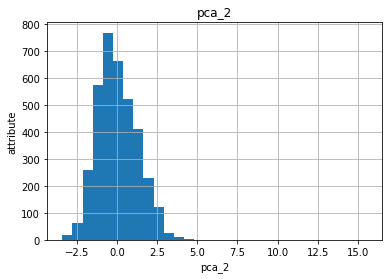

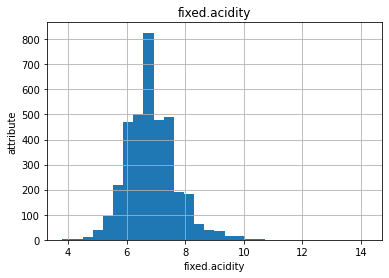

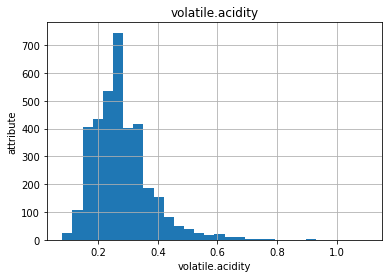

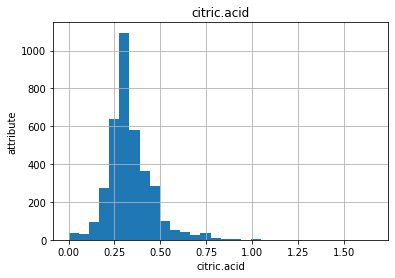

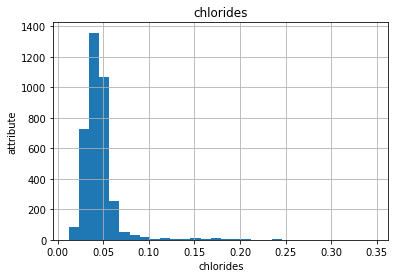

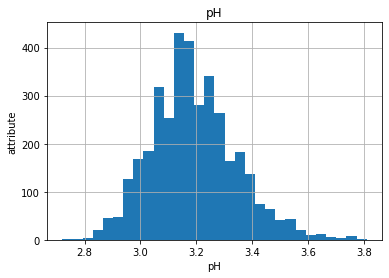

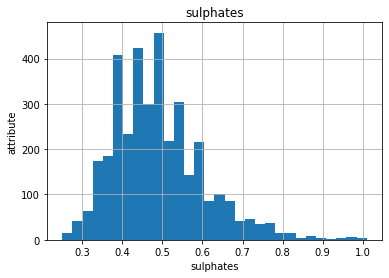

In [69]:
ignore = ['quality']
var = [x for x in new.columns if x not in ignore]
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('attribute')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for i in var:
    analyse_continuous(new, i)

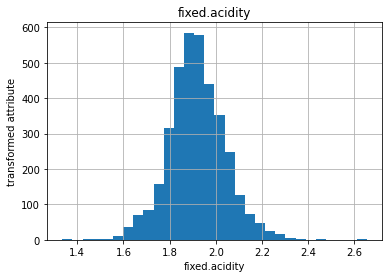

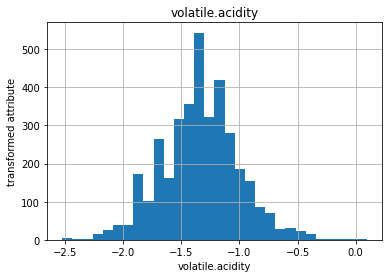

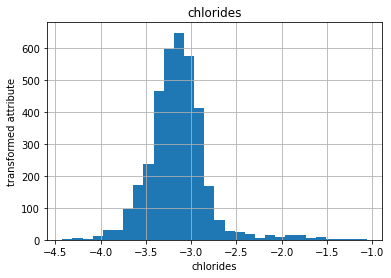

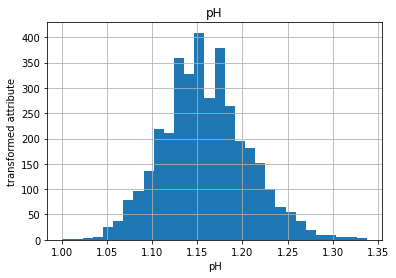

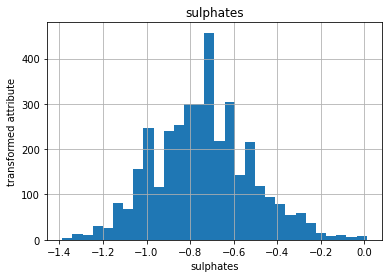

In [72]:
def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(df[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('transformed attribute')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for i in var:
    analyse_transformed_continuous(new, i)

In [75]:
new['sulphates'] = np.log(new['sulphates'])
new['chlorides'] = np.log(new['chlorides'])
new['pH'] = np.log(new['pH'])
new['fixed.acidity'] = np.log(new['fixed.acidity'])
new['volatile.acidity'] = np.log(new['volatile.acidity'])

In [76]:
new

,pca_1,pca_2,fixed.acidity,volatile.acidity,citric.acid,chlorides,pH,sulphates,quality
0,0.289083,1.030793,2.197225,-1.406497,0.38,-3.101093,1.075002,-1.049822,1
1,-1.851597,-0.822625,2.104134,-0.867501,0.29,-3.506558,1.098612,-1.139434,2
2,-0.291017,-1.771163,1.856298,-1.514128,0.32,-3.575551,1.141033,-0.597837,2
3,-0.521782,-0.848899,1.609438,-1.049822,0.25,-3.473768,1.220830,-0.916291,1
4,-0.020593,0.805499,2.001480,-1.203973,0.30,-2.937463,1.137833,-0.798508,1
...,...,...,...,...,...,...,...,...,...
3668,-0.533670,-0.408399,1.960095,-1.078810,0.32,-2.975930,1.193922,-0.693147,1
3669,-0.495619,-1.157518,1.856298,-1.237874,0.57,-2.813411,1.118415,-0.891598,0
3670,0.767345,2.577189,2.079442,-1.347074,0.28,-3.270169,1.137833,-0.579818,1
3671,0.105837,-0.864686,1.902108,-1.897120,0.29,-2.847312,1.258461,-0.820981,2


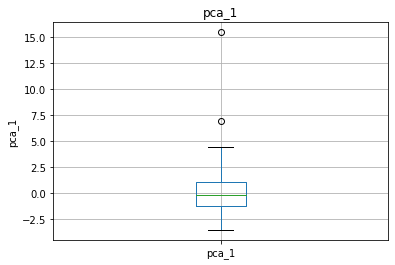

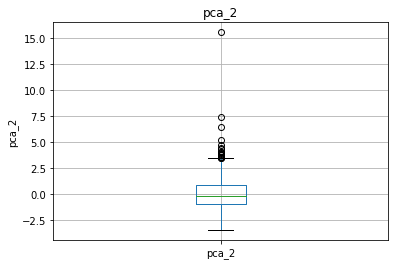

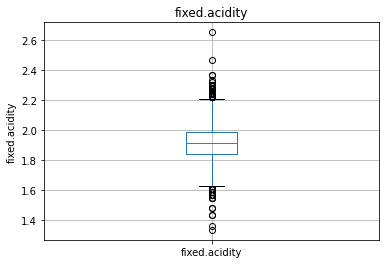

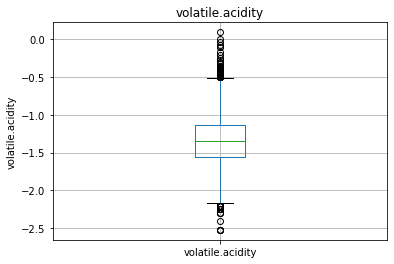

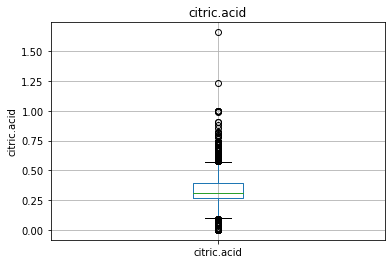

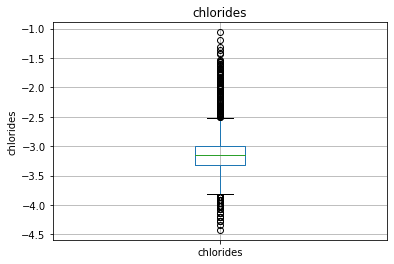

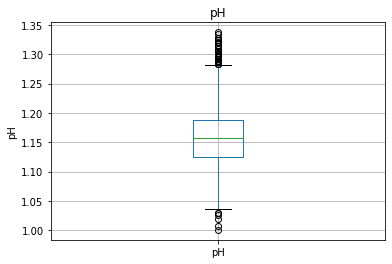

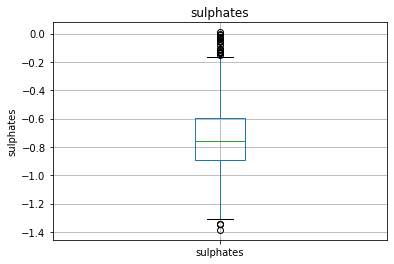

In [77]:
def find_outliers(df, var):
    df = df.copy()
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for i in var:
    find_outliers(new, i)

In [78]:
#Remove outliers
import numpy as np
from scipy import stats
new = new[(np.abs(stats.zscore(new)) < 3).all(axis=1)]
new.shape

(3464, 9)

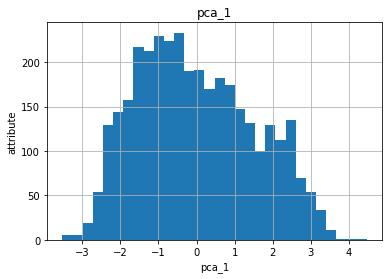

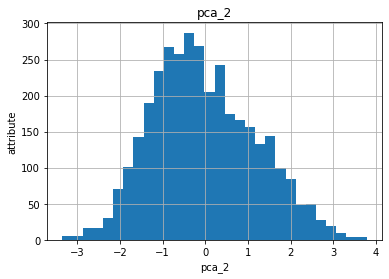

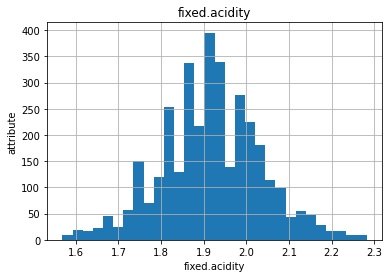

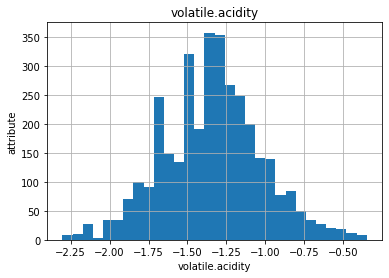

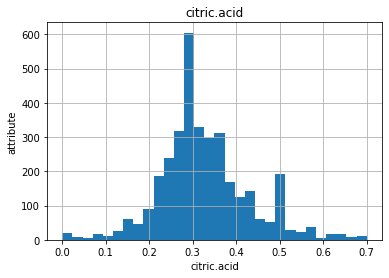

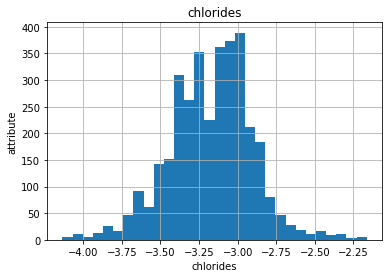

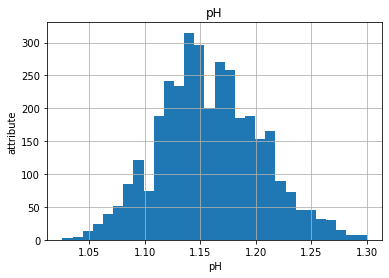

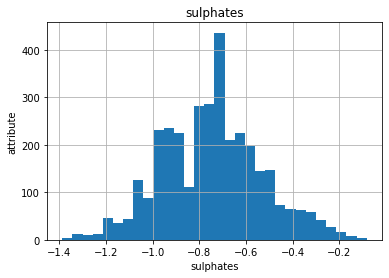

In [87]:
for i in var:
    analyse_continuous(new, i)

In [94]:
#Split - OHE
X, y = new.drop(columns = ignore).values, new.quality.values #.astype(float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 135)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf2 = RandomForestClassifier()
# fit the model
clf2.fit(X_train, y_train)
# checking the accuracy score
rnd_score = clf2.score(X_test, y_test)

print('score of model is : ', rnd_score)

score of model is :  0.6596153846153846
